**Alunos**
* Guilherme Augusto Anício Drummond do Nascimento - 20.1.4007
* Henrique Dantas Pighini - 21.1.4025

**[San Francisco Crime Classification](https://www.kaggle.com/competitions/sf-crime/overview)**

## Preparação do ambiente

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_set_original = pd.read_csv("dataset/train.csv", delimiter=",")
test_set_original = pd.read_csv("dataset/test.csv", delimiter=",")

In [ ]:
train_set_original

In [ ]:
test_set_original

## Fase 1 - Pré-processamento e transformação


### 1. Descrição dos atributos


O conjunto de dados possui os seguintes atributos:
* Dates;
* Category;
* Descript (apenas no conjunto de treinamento);
* DayOfWeek;
* PdDistrict;
* Resolution (apenas no conjunto de treinamento);
* Address;
* X;
* Y

Para a categorização de tipo de dados vamos usar as seguintes definições:

* Dados Contínuos: Podem assumir qualquer valor dentro de um intervalo, e há uma infinitude de valores possíveis.
* Dados Discretos: Representam valores distintos e contáveis, geralmente números inteiros, e não podem ser subdivididos em partes menores.
* Dados Categóricos: Representam categorias ou rótulos e pode ou não ter uma ordem ou hierarquia natural.
    * Dados Categóricos Nominais: Representam categorias sem uma ordem ou hierarquia intrínseca entre elas, sendo apenas rótulos descritivos.
    * Dados Categóricos Ordinais: Representam categorias com uma ordem ou hierarquia específica entre elas, permitindo a classificação ou ordenação com base em alguma característica subjacente.
* Dados Binários: Dados binários são uma forma especial de dados categóricos que têm apenas duas categorias possíveis, geralmente representadas como 0 e 1
    * Simétricos : Quando a probabilidade dos casos acontecerem é a mesma
    * Assimétrico : Quando a probabilidade dos casos acontecerem é abígua


#### Dates


`Dates` representa a data em que o crime ocorreu, formatado como `Y-m-d H:i:s`. <br>
Os conjuntos de treinamento e teste rotacionam toda semana, ou seja, semanas 1,3,5,7... são do conjunto de treinamento e semanas 2,4,6,8... são do conjunto de treinamento. 

Ele é um tipo dado discreto, no intervalo de `2003-01-01 00:01:00` a `2015-05-13 23:53:00`. <br>
Esse atributo não possui valores nulos.

In [ ]:
train_set_dates = train_set_original["Dates"]
print(f"Data mais antiga:  {train_set_dates.min()}")
print(f"Data mais recente: {train_set_dates.max()}")

print("\nElementos vazios:")
print(train_set_dates.filter(train_set_dates.isnull()))

In [ ]:
test_set_dates = test_set_original["Dates"]
print(f"Data mais antiga:  {test_set_dates.min()}")
print(f"Data mais recente: {test_set_dates.max()}")

print("\nElementos vazios:")
print(test_set_dates.filter(test_set_dates.isnull()))

In [ ]:
train_set_dates = pd.to_datetime(train_set_original["Dates"])
horarios = train_set_dates.dt.strftime('%H:%M:%S')

print("Conjunto de treinamento:\n")
print(f"Horário mais antigo:  {horarios.min()}")
print(f"Horário mais recente: {horarios.max()}")

In [ ]:
test_set_dates = pd.to_datetime(test_set_original["Dates"])
horarios = test_set_dates.dt.strftime('%H:%M:%S')

print("Conjunto de teste:\n")
print(f"Horário mais antigo:  {horarios.min()}")
print(f"Horário mais recente: {horarios.max()}")

#### Category

`Category` representa as possíveis categorias que um crime pode ser classificado. <br>
É um tipo de dado categórico nominal e pode ser distribuído nos seguintes valores com suas respectivas populações:

`Category` é o valor que o modelo tentará prever e não está presente no conjunto de testes.

In [ ]:
train_set_categorys = train_set_original["Category"].value_counts().to_frame()
train_set_categorys = train_set_categorys.reset_index()
train_set_categorys.columns = ["Category", "Total"]

display(train_set_categorys)

#### Descript

`Descript` representa uma breve descrição expandida do crime. <br>
Está presente apenas no conjunto de treinamento. <br>
É um tipo de dado categórico nominal e pode ser distribuído nos seguintes valores com suas respectivas populações:

In [ ]:
train_set_descript = train_set_original["Descript"].value_counts().to_frame()
train_set_descript = train_set_descript.reset_index()
train_set_descript.columns = ["Descript", "Total"]

display(train_set_descript)

#### DayOfWeek

`DayOfWeek` representa o dia em que o crime ocorreu. <br>
É um tipo de dado categórico ordinal e pode ser distribuído nos seguintes valores com suas respectivas populações:

In [ ]:
train_set_DoW = train_set_original["DayOfWeek"].value_counts().to_frame()
train_set_DoW = train_set_DoW.reset_index()
train_set_DoW.columns = ["DayOfWeek", "Total"]

test_set_DoW = test_set_original["DayOfWeek"].value_counts().to_frame()
test_set_DoW = test_set_DoW.reset_index()
test_set_DoW.columns = ["DayOfWeek", "Total"]

display(train_set_DoW)
display(test_set_DoW)

#### PdDistrict

`PdDistrict` representa o departamento de polícia que ficou encarregado do crime. <br>
É um tipo de dado categórico nominal e pode ser distribuído nos seguintes valores com suas respectivas populações:

In [ ]:
train_set_PdDistrict = train_set_original["PdDistrict"].value_counts().to_frame()
train_set_PdDistrict = train_set_PdDistrict.reset_index()
train_set_PdDistrict.columns = ["PdDistrict", "Total"]

test_set_PdDistrict = test_set_original["PdDistrict"].value_counts().to_frame()
test_set_PdDistrict = test_set_PdDistrict.reset_index()
test_set_PdDistrict.columns = ["PdDistrict", "Total"]


display(train_set_PdDistrict)
display(test_set_PdDistrict)

In [ ]:
test_set_PdDistrict = test_set_original["PdDistrict"].value_counts().to_frame()
test_set_PdDistrict = test_set_PdDistrict.reset_index()
test_set_PdDistrict.columns = ["PdDistrict", "Total"]

display(test_set_PdDistrict)

#### Resolution

`Resolution` representa qual fim teve um crime. <br>
Está presente apenas no conjunto de treinamento. <br>
É um tipo de dado categórico nominal e pode ser distribuído nos seguintes valores com suas respectivas populações:

Caso o valor seja `NONE`, significa que o caso não teve resolução.

In [ ]:
train_set_resolution = train_set_original["Resolution"].value_counts().to_frame()
train_set_resolution = train_set_resolution.reset_index()
train_set_resolution.columns = ["Resolution", "Total"]

display(train_set_resolution)

#### Address

`Address` representa o endereço em que o crime ocorreu. <br>
É um tipo de dado categórico nominal e pode ser distribuído nos seguintes valores com suas respectivas populações:

In [ ]:
train_set_address = train_set_original["Address"].value_counts().to_frame()
train_set_address = train_set_address.reset_index()
train_set_address.columns = ["Address", "Total"]

test_set_address = test_set_original["Address"].value_counts().to_frame()
test_set_address = test_set_address.reset_index()
test_set_address.columns = ["Address", "Total"]


display(train_set_address)
display(test_set_address)

#### X

`X` representa a cordenada X em que o crime aconteceu, é utilizado para identificar com precisão onde o crime foi registrado. <br>
É um tipo de dado contínuo, que é relacionado com o valor de coordenada `Y` gerando assim um ponto no espaço, que por sua vez, pode <br> 
ser usado para encontrar um endereço aproximado, que é o atributo `Address`.

In [ ]:
train_set_X = train_set_original["X"]
display(train_set_X.describe())
display(train_set_X[:10])

In [ ]:
test_set_X = test_set_original["X"]
display(test_set_X.describe())
display(test_set_X[:10])

#### Y

`Y` representa a cordenada Y em que o crime aconteceu, é utilizado para identificar com precisão onde o crime foi registrado. <br>
É um tipo de dado contínuo, que é relacionado com o valor de cordenada `X` gerando assim um ponto no espaço, que por sua vez, pode <br> 
ser usado para encontrar um endereço aproximado, que é o atributo `Address`.

In [ ]:
train_set_Y = train_set_original["Y"]
display(train_set_Y.describe())
display(train_set_Y[:10])

In [ ]:
test_set_Y = test_set_original["Y"]
display(test_set_Y.describe())
display(test_set_Y[:10])

#### Plotando pontos no mapa

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
ax[0].set_title("Conjunto de treinamento")
ax[1].set_title("Conjunto de teste")

print(f"Número total de instâncias no conjunto de treinamento: {train_set_original.shape}")

print(f"\nNúmero total de instâncias com 'X' < -121.50: {train_set_original[train_set_original['X'] < -121.50].shape}")
print(f"Número total de instâncias com 'X' >= -121.50: {train_set_original[train_set_original['X'] >= -121.50].shape}")

print(f"\nNúmero total de instâncias com 'Y' < 60: {train_set_original[train_set_original['Y'] < 60].shape}")
print(f"Número total de instâncias com 'Y'> = 60: {train_set_original[train_set_original['Y'] >= 60].shape}")

print("\n", "-"*100, "\n")

print(f"Número total de instâncias no conjunto de teste: {test_set_original.shape}")

print(f"\nNúmero total de instâncias com 'X' < -121.50: {test_set_original[test_set_original['X'] < -121.50].shape}")
print(f"Número total de instâncias com 'X' >= -121.50: {test_set_original[test_set_original['X'] >= -121.50].shape}")

print(f"\nNúmero total de instâncias com 'Y' < 60: {test_set_original[test_set_original['Y'] < 60].shape}")
print(f"Número total de instâncias com 'Y'> = 60: {test_set_original[test_set_original['Y'] >= 60].shape}")

train_set_original.plot.scatter(x='X', y='Y', ax=ax[0], c="Darkblue")
test_set_original.plot.scatter(x='X', y='Y', ax=ax[1], c="Green")

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
ax[0].set_title("Conjunto de treinamento")
ax[1].set_title("Conjunto de teste")

world = gpd.read_file('dataset/110m_cultural/ne_110m_admin_0_countries.shp')

world.plot(color="lightgrey", ax=ax[0])
world.plot(color="lightgrey", ax=ax[1])
train_set_original.plot.scatter(x='X', y='Y', c='DarkBlue', ax=ax[0])
test_set_original.plot.scatter(x='X', y='Y', c='Green', ax=ax[1])

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,6))
ax[0].set_title("Conjunto de treinamento")
ax[1].set_title("Conjunto de teste")

# world

# USA_map = world[world["SOVEREIGNT"] == "United States of America"]
# USA_map.plot(color="lightgrey", ax=ax[0])
# USA_map.plot(color="lightgrey", ax=ax[1])

SF_map = gpd.read_file("dataset/BayAreaGeneralOutline/s7d02x.shp")
SF_map = SF_map[SF_map["AREA_NAME"] == "San Francisco"]
SF_map.plot(color="lightgrey", ax=ax[0])
SF_map.plot(color="lightgrey", ax=ax[1])

train_set_original[train_set_original['X'] < -122][:10].plot.scatter(x='X', y='Y', ax=ax[0], c='DarkBlue')
test_set_original[test_set_original['X'] < -122][:10].plot.scatter(x='X', y='Y', ax=ax[1], c='Green')

### 2. Limpeza de dados e transformação 

#### Valores Nulos

No banco de dados que escolhemos não foram encontrado valores ausentes nos atributos.<br>
Na campo `Resolution` existe um valor <span style="color:lightblue;">NONE</span>, porém seu significado é de não resolução para o caso investigado.

Dessa forma, para melhorar a legibilidade, substituímos os valores <span style="color:lightblue;">NONE</span> para <span style="color:lightblue;">NO RESOLUTION</span>.

In [ ]:
train_set_original = train_set_original.replace(to_replace="NONE", value="NO RESOLUTION")

display(train_set_original)

#### Removendo valores que não fazem parte do treinamento

Como `Resolution` e `Descript` só fazem parte do conjunto de treinamento e não aparecem no conjunto de teste, não será possível usá-los para o treinamento.

In [ ]:
train_set_utils = train_set_original[['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'Category']]
test_set_utils = test_set_original[['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']]

display(train_set_utils, test_set_utils)

#### Inconsistências

No banco de dados que escolhemos conseguimos identificar inconsistências nos atributos de coordenadas : `X` e `Y`. <br>

Nosso banco de dados armazena alguns atributos básicos de crimes realizados em São Francisco, e como os atributos em sua maioria são categóricos, <br>
não é possível identificar atributos inconsistentes sem generalizar ou criar uma regra de podas para os mesmos, o que poderia ser prejudicial <br>
ao intúito de treinar uma inteligência artificial, pois seria possível enviesar os dados.

Nossos dados numéricos são: `Dates`, `X` e `Y`.

Em `Dates` com o range conseguimos identificar os valores em que se encontram as datas então conseguimos com uma breve análise garantir a não existência <br> de inconsistências

Já nos atributos de coordenada `X` e `Y` pensamos que algumas instâncias poderiam não estar categorizando regiões em são francisco. <br>
Após pesquisa, conseguimos identificar alguns pequenos casos em que as coordenadas estavam incongruentes então realizamos uma poda que retirou menos <br>
de 0.001% das nossas entradas.

O total de instâncias excluídas no conjunto de treinamento é 878049 - 877982 = 67 (aproximadamente 0.00007630553%)

O total de instâncias excluídas no conjunto de teste é 884262 - 884186 = 76 (aproximadamente 0.00008594737%) 

In [ ]:
train_set_utils = train_set_utils[train_set_utils["Y"] < 60]
test_set_utils = test_set_utils[test_set_utils["Y"] < 60]

display(train_set_utils, test_set_utils)

#### Separando atributo alvo

In [ ]:
target_train = train_set_utils[['Category']]
train_set_utils = train_set_utils.drop(columns="Category")

#### Transformando e normalizando atributos categóricos em um vetor numérico

##### Criando cópia para transformar

In [ ]:
train_set_transformed = train_set_utils.copy()

test_set_transformed = test_set_utils.copy()

display(train_set_transformed)
display(test_set_transformed)

##### `PdDistrict`

In [ ]:
PdDistrict_encoder = LabelEncoder()

PdDistricts = train_set_utils["PdDistrict"].to_numpy().reshape(-1)

PdDistrict_encoder.fit(PdDistricts)

train_PdDistrict_encoded = PdDistrict_encoder.transform(PdDistricts)
test_PdDistrict_encoded = PdDistrict_encoder.transform(test_set_utils["PdDistrict"].to_numpy().reshape(-1))

# train_set_transformed["PdDistrict"] = PdDistrict_encoded / PdDistrict_encoded.max()
# test_set_transformed["PdDistrict"] = test_PdDistrict_encoded / PdDistrict_encoded.max()

train_set_transformed["PdDistrict"] = train_PdDistrict_encoded
test_set_transformed["PdDistrict"] = test_PdDistrict_encoded

print(f'(min, max) = ({train_set_transformed["PdDistrict"].min()}, {train_set_transformed["PdDistrict"].max()})')
print(f'(min, max) = ({test_set_transformed["PdDistrict"].min()}, {test_set_transformed["PdDistrict"].max()})')

display(train_set_transformed)
display(test_set_transformed)

##### `Category`

In [ ]:
Category_encoder = LabelEncoder()

indexTemp = target_train.index
target_train_transformed = target_train.to_numpy().reshape(-1)

Category_encoder.fit(target_train_transformed)

target_train_transformed = Category_encoder.transform(target_train_transformed)

target_train_transformed = pd.DataFrame(target_train_transformed, columns=["Category"], index=indexTemp)

display(target_train_transformed)

##### `Day of week`

In [ ]:
days = {
    "Sunday": 0,
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6
}

train_set_transformed["DayOfWeek"] = train_set_utils["DayOfWeek"].replace(days)
# train_set_transformed["DayOfWeek"] = train_set_transformed["DayOfWeek"] / train_set_transformed["DayOfWeek"].max()

test_set_transformed["DayOfWeek"] = test_set_utils["DayOfWeek"].replace(days)
# test_set_transformed["DayOfWeek"] = test_set_transformed["DayOfWeek"] / test_set_transformed["DayOfWeek"].max()

print(f'(min, max) = ({train_set_transformed["DayOfWeek"].min()}, {train_set_transformed["DayOfWeek"].max()})')
print(f'(min, max) = ({test_set_transformed["DayOfWeek"].min()}, {test_set_transformed["DayOfWeek"].max()})')


display(train_set_transformed)
display(test_set_transformed)

##### `Address`

In [ ]:
def processAddress(address):
    return [word for word in address.split(" ") if word.isupper() and (len(word) > 2)]

train_address = list(map(processAddress, train_set_utils["Address"]))
test_address = list(map(processAddress, test_set_utils["Address"]))

train_set_transformed["Address"] = train_address
test_set_transformed["Address"] = test_address

display(train_set_transformed)
display(test_set_transformed)

# display(train_address)
# uniqueStreets = set([street for i in train_address for street in i])
# display(len(uniqueStreets))

##### `X`

In [ ]:
train_X = pd.cut(train_set_utils["X"], bins=10, labels=False)
test_X = pd.cut(test_set_utils["X"], bins=10, labels=False)

train_set_transformed["X"] = train_X
test_set_transformed["X"] = test_X

display(train_set_transformed)
display(test_set_transformed)

##### `Y`

In [ ]:
train_Y = pd.cut(train_set_utils["Y"], bins=10, labels=False)
test_Y = pd.cut(test_set_utils["Y"], bins=10, labels=False)

train_set_transformed["Y"] = train_Y
test_set_transformed["Y"] = test_Y

display(train_set_transformed)
display(test_set_transformed)

##### `Dates`

In [181]:
def processDates(set_transformed, set_utils):
    dates = pd.to_datetime(set_utils["Dates"])

    year = dates.dt.year
    month = dates.dt.month
    day = dates.dt.day
    period = pd.cut(dates.dt.hour, bins=[0, 6, 12, 18, 24], right=False, labels=["Madrugada", "Manha", "Tarde", "Noite"])

    set_transformed["Year"] = year
    set_transformed["Month"] = month
    set_transformed["Day"] = day
    set_transformed["Period"] = period
    if "Dates" in set_transformed:
        set_transformed = set_transformed.drop(columns="Dates")

    return set_transformed

train_set_transformed = processDates(train_set_transformed, train_set_utils)
test_set_transformed = processDates(test_set_transformed, test_set_utils)

# display(dates)
display(train_set_transformed)
display(test_set_transformed)

DayOfWeek  PdDistrict  X  Y  Year  Month  Day     Period
0               3           4  5  5  2015      5   13      Noite
1               3           4  5  5  2015      5   13      Noite
2               3           4  6  8  2015      5   13      Noite
3               3           4  5  8  2015      5   13      Noite
4               3           5  5  5  2015      5   13      Noite
...           ...         ... .. ..   ...    ...  ...        ...
878044          1           8  3  0  2003      1    6  Madrugada
878045          1           2  4  2  2003      1    6  Madrugada
878046          1           7  7  6  2003      1    6  Madrugada
878047          1           7  8  6  2003      1    6  Madrugada
878048          1           0  7  2  2003      1    6  Madrugada

[877982 rows x 8 columns]

DayOfWeek  PdDistrict        Address  X  Y  Year  Month  Day  \
0               0           0       [THOMAS]  7  2  2015      5   10   
1               0           0  [3RD, REVERE]  8  2  2015      5   10   
2               0           4        [GOUGH]  5  7  2015      5   10   
3               0           2      [MISSION]  5  1  2015      5   10   
4               0           2      [MISSION]  5  1  2015      5   10   
...           ...         ...            ... .. ..   ...    ...  ...   
884257          3           3       [BRYANT]  7  3  2003      1    1   
884258          3           4   [WASHINGTON]  5  7  2003      1    1   
884259          3           2      [MISSION]  4  0  2003      1    1   
884260          3           0       [HUDSON]  8  2  2003      1    1   
884261          3           8        [SLOAT]  1  2  2003      1    1   

           Period  
0           Noite  
1           Noite  
2           Noite  
3           Noite  
4           Noite  
...           ...  
884257  Madrugada  
884258  Madrugada  
884259  Madrugada  
884260  Madrugada  
884261  Madrugada  

[884186 rows x 9 columns]

## Fase 2 - Mineração dos dados com avaliação e análise de resultados iniciais

### Mineração de regras de associação

#### apyori

In [117]:
import apyori

In [118]:
def processInstance(instance):
    transaction = []
    for i in instance.index:
        if type(instance[i]) is list:
            for j in instance[i]:
                transaction.append(f"{i} = {j}")
        else:
            transaction.append(f"{i} = {instance[i]}")

    return transaction

In [119]:
train_teste = pd.concat([train_set_transformed, target_train], axis=1)

transactions = train_teste.apply(processInstance, axis=1)
transactions = transactions.tolist()

In [120]:
display(transactions[:10])

[['DayOfWeek = 3',
  'PdDistrict = 4',
  'Address = OAK',
  'Address = LAGUNA',
  'X = 5',
  'Y = 5',
  'Year = 2015',
  'Month = 5',
  'Day = 13',
  'Period = Noite',
  'Category = WARRANTS'],
 ['DayOfWeek = 3',
  'PdDistrict = 4',
  'Address = OAK',
  'Address = LAGUNA',
  'X = 5',
  'Y = 5',
  'Year = 2015',
  'Month = 5',
  'Day = 13',
  'Period = Noite',
  'Category = OTHER OFFENSES'],
 ['DayOfWeek = 3',
  'PdDistrict = 4',
  'Address = VANNESS',
  'Address = GREENWICH',
  'X = 6',
  'Y = 8',
  'Year = 2015',
  'Month = 5',
  'Day = 13',
  'Period = Noite',
  'Category = OTHER OFFENSES'],
 ['DayOfWeek = 3',
  'PdDistrict = 4',
  'Address = LOMBARD',
  'X = 5',
  'Y = 8',
  'Year = 2015',
  'Month = 5',
  'Day = 13',
  'Period = Noite',
  'Category = LARCENY/THEFT'],
 ['DayOfWeek = 3',
  'PdDistrict = 5',
  'Address = BRODERICK',
  'X = 5',
  'Y = 5',
  'Year = 2015',
  'Month = 5',
  'Day = 13',
  'Period = Noite',
  'Category = LARCENY/THEFT'],
 ['DayOfWeek = 3',
  'PdDistrict = 

In [121]:
teste = apyori.apriori(transactions)
# teste = apyori.apriori(transactions, min_support=0.2)
# teste = apyori.apriori(transactions, min_support=0.3, min_confidence=0.5)

result = list(teste)
print(len(result))

33


In [123]:
display(result)

[RelationRecord(items=frozenset({'Category = LARCENY/THEFT'}), support=0.19918973281912386, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Category = LARCENY/THEFT'}), confidence=0.19918973281912386, lift=1.0)]),
 RelationRecord(items=frozenset({'Category = NON-CRIMINAL'}), support=0.10512743997029551, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Category = NON-CRIMINAL'}), confidence=0.10512743997029551, lift=1.0)]),
 RelationRecord(items=frozenset({'Category = OTHER OFFENSES'}), support=0.1436988457622138, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Category = OTHER OFFENSES'}), confidence=0.1436988457622138, lift=1.0)]),
 RelationRecord(items=frozenset({'DayOfWeek = 0'}), support=0.132919581494837, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'DayOfWeek = 0'}), confidence=0.132919581494837, lift=1.0)]),
 RelationRecord(items=frozenset(

In [124]:
for rule in result:
    if(len(rule.items) == 1):
        continue
    for i in rule.ordered_statistics:
        items = ', '.join(rule.items)
        antecedents = ', '.join(i.items_base)
        consequeces = ', '.join(i.items_add)
        
        
        support = rule.support
        confidence = i.confidence
        lift = i.lift
        
        if(len(antecedents) != 0):
            print(f"Rule: [{antecedents}] -> [{consequeces}] Support: {support:.4f} Confidence: {confidence:.4f} Lift: {lift:.4f}\n")
            


Rule: [PdDistrict = 7] -> [X = 7] Support: 0.1130 Confidence: 0.6312 Lift: 2.5953

Rule: [X = 7] -> [PdDistrict = 7] Support: 0.1130 Confidence: 0.4646 Lift: 2.5953

Rule: [PdDistrict = 7] -> [Y = 6] Support: 0.1329 Confidence: 0.7424 Lift: 2.3017

Rule: [Y = 6] -> [PdDistrict = 7] Support: 0.1329 Confidence: 0.4120 Lift: 2.3017

Rule: [Period = Noite] -> [X = 6] Support: 0.1142 Confidence: 0.3568 Lift: 1.0138

Rule: [X = 6] -> [Period = Noite] Support: 0.1142 Confidence: 0.3246 Lift: 1.0138

Rule: [Period = Noite] -> [Y = 6] Support: 0.1016 Confidence: 0.3174 Lift: 0.9841

Rule: [Y = 6] -> [Period = Noite] Support: 0.1016 Confidence: 0.3151 Lift: 0.9841

Rule: [Period = Tarde] -> [X = 6] Support: 0.1112 Confidence: 0.3352 Lift: 0.9524

Rule: [X = 6] -> [Period = Tarde] Support: 0.1112 Confidence: 0.3159 Lift: 0.9524

Rule: [Period = Tarde] -> [Y = 6] Support: 0.1116 Confidence: 0.3365 Lift: 1.0433

Rule: [Y = 6] -> [Period = Tarde] Support: 0.1116 Confidence: 0.3461 Lift: 1.0433

Rule

Regras com o consequente `Category`

In [132]:
for rule in result:
    if(len(rule.items) == 1):
        continue
    for i in rule.ordered_statistics:
        for j in i.items_add:
            if("Category" in j):
                items = ', '.join(rule.items)
                antecedents = ', '.join(i.items_base)
                consequeces = ', '.join(i.items_add)
                
                
                support = rule.support
                confidence = i.confidence
                lift = i.lift
                
                if(len(antecedents) != 0):
                    print(f"Rule: [{antecedents}] -> [{consequeces}] Support: {support:.4f} Confidence: {confidence:.4f} Lift: {lift:.4f}\n")
                    

##### Testes com o `Ano`

In [126]:
aprioriAno = {}

for i in train_teste["Year"].unique():
    print(i)
    anoTeste = train_teste[train_teste["Year"] == i]
    anoTeste = anoTeste.drop(columns="Year")
    anoTeste = anoTeste.apply(processInstance, axis=1)
    anoTeste = anoTeste.tolist()
    anoTeste = apyori.apriori(anoTeste)

    aprioriAno[i] = list(anoTeste)

2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003


In [127]:
aprioriAno.keys()

dict_keys([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003])

In [128]:
for i in aprioriAno.keys():
    print(aprioriAno[i])

[RelationRecord(items=frozenset({'Category = LARCENY/THEFT'}), support=0.27229553364269143, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Category = LARCENY/THEFT'}), confidence=0.27229553364269143, lift=1.0)]), RelationRecord(items=frozenset({'Category = NON-CRIMINAL'}), support=0.12358613689095127, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Category = NON-CRIMINAL'}), confidence=0.12358613689095127, lift=1.0)]), RelationRecord(items=frozenset({'Category = OTHER OFFENSES'}), support=0.1314530162412993, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Category = OTHER OFFENSES'}), confidence=0.1314530162412993, lift=1.0)]), RelationRecord(items=frozenset({'DayOfWeek = 0'}), support=0.12916908352668213, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'DayOfWeek = 0'}), confidence=0.12916908352668213, lift=1.0)]), RelationRecord(items=frozenset(

In [129]:
for i in aprioriAno.keys():
    print(len(aprioriAno[i]))
#Cada valor respresenta uma regra

36
34
34
34
33
35
35
36
34
30
31
31
31


In [131]:
for ano in aprioriAno.keys():
    for rule in aprioriAno[ano]:
        if(len(rule.items) == 1):
            continue
        for i in rule.ordered_statistics:
            items = ', '.join(rule.items)
            antecedents = ', '.join(i.items_base)
            
            consequeces = ', '.join(i.items_add)
            
            
            support = rule.support
            confidence = i.confidence
            lift = i.lift
            
            if(len(antecedents) == 0):
                print(f"Rule: [Ano = {ano}] -> [{consequeces}] Support: {support:.4f} Confidence: {confidence:.4f} Lift: {lift:.4f}")
            else:        
                print(f"Rule: [Ano = {ano}, {antecedents}] -> [{consequeces}] Support: {support:.4f} Confidence: {confidence:.4f} Lift: {lift:.4f}")
            
            print("")

Rule: [Ano = 2015] -> [Category = LARCENY/THEFT, Period = Noite] Support: 0.1144 Confidence: 0.1144 Lift: 1.0000

Rule: [Ano = 2015, Category = LARCENY/THEFT] -> [Period = Noite] Support: 0.1144 Confidence: 0.4201 Lift: 1.2379

Rule: [Ano = 2015, Period = Noite] -> [Category = LARCENY/THEFT] Support: 0.1144 Confidence: 0.3371 Lift: 1.2379

Rule: [Ano = 2015] -> [PdDistrict = 7, X = 7] Support: 0.1156 Confidence: 0.1156 Lift: 1.0000

Rule: [Ano = 2015, PdDistrict = 7] -> [X = 7] Support: 0.1156 Confidence: 0.6139 Lift: 2.3682

Rule: [Ano = 2015, X = 7] -> [PdDistrict = 7] Support: 0.1156 Confidence: 0.4461 Lift: 2.3682

Rule: [Ano = 2015] -> [PdDistrict = 7, Y = 6] Support: 0.1342 Confidence: 0.1342 Lift: 1.0000

Rule: [Ano = 2015, PdDistrict = 7] -> [Y = 6] Support: 0.1342 Confidence: 0.7123 Lift: 2.3058

Rule: [Ano = 2015, Y = 6] -> [PdDistrict = 7] Support: 0.1342 Confidence: 0.4343 Lift: 2.3058

Rule: [Ano = 2015] -> [Period = Noite, X = 6] Support: 0.1085 Confidence: 0.1085 Lift: 1

Regras com o consequente `Category`

In [133]:
for ano in aprioriAno.keys():
    for rule in aprioriAno[ano]:
        if(len(rule.items) == 1):
            continue
        for i in rule.ordered_statistics:
            for j in i.items_add:
                if("Category" in j):
                    items = ', '.join(rule.items)
                    antecedents = ', '.join(i.items_base)
                    
                    consequeces = ', '.join(i.items_add)
                    
                    
                    support = rule.support
                    confidence = i.confidence
                    lift = i.lift
                    
                    if(len(antecedents) == 0):
                        print(f"Rule: [Ano = {ano}] -> [{consequeces}] Support: {support:.4f} Confidence: {confidence:.4f} Lift: {lift:.4f}")
                    else:        
                        print(f"Rule: [Ano = {ano}, {antecedents}] -> [{consequeces}] Support: {support:.4f} Confidence: {confidence:.4f} Lift: {lift:.4f}")
                    
                    print("")


Rule: [Ano = 2015] -> [Category = LARCENY/THEFT, Period = Noite] Support: 0.1144 Confidence: 0.1144 Lift: 1.0000

Rule: [Ano = 2015, Period = Noite] -> [Category = LARCENY/THEFT] Support: 0.1144 Confidence: 0.3371 Lift: 1.2379

Rule: [Ano = 2014] -> [Category = LARCENY/THEFT, Period = Noite] Support: 0.1019 Confidence: 0.1019 Lift: 1.0000

Rule: [Ano = 2014, Period = Noite] -> [Category = LARCENY/THEFT] Support: 0.1019 Confidence: 0.3059 Lift: 1.2102



##### Teste com `Distrito`

In [134]:
aprioriDistrict = {}

for i in train_teste["PdDistrict"].unique():
    print(i)
    districtTeste = train_teste[train_teste["PdDistrict"] == i]
    districtTeste = districtTeste.drop(columns="PdDistrict")
    districtTeste = districtTeste.apply(processInstance, axis=1)
    districtTeste = districtTeste.tolist()
    districtTeste = apyori.apriori(districtTeste)

    aprioriDistrict[i] = list(districtTeste)

4
5
2
0
6
1
8
9
3
7


In [135]:
aprioriDistrict.keys()

dict_keys([4, 5, 2, 0, 6, 1, 8, 9, 3, 7])

In [136]:
for i in aprioriDistrict.keys():
    print(aprioriDistrict[i])

[RelationRecord(items=frozenset({'Address = POLK'}), support=0.10011017818471943, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Address = POLK'}), confidence=0.10011017818471943, lift=1.0)]), RelationRecord(items=frozenset({'Category = LARCENY/THEFT'}), support=0.2719121613920444, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Category = LARCENY/THEFT'}), confidence=0.2719121613920444, lift=1.0)]), RelationRecord(items=frozenset({'Category = OTHER OFFENSES'}), support=0.11616199992401505, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Category = OTHER OFFENSES'}), confidence=0.11616199992401505, lift=1.0)]), RelationRecord(items=frozenset({'DayOfWeek = 0'}), support=0.1355476615630105, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'DayOfWeek = 0'}), confidence=0.1355476615630105, lift=1.0)]), RelationRecord(items=frozenset({'DayOfWeek = 1'}), 

In [137]:
for i in aprioriDistrict.keys():
    print(len(aprioriDistrict[i]))
#Cada valor respresenta uma regra

34
37
32
32
32
40
26
84
38
48


In [139]:
for distrito in aprioriDistrict.keys():
    for rule in aprioriDistrict[distrito]:
        if(len(rule.items) == 1):
            continue
        # print(rule)
        for i in rule.ordered_statistics:
            items = ', '.join(rule.items)
            antecedents = ', '.join(i.items_base)
            
            consequeces = ', '.join(i.items_add)
            
            
            support = rule.support
            confidence = i.confidence
            lift = i.lift
            
            if(len(antecedents) == 0):
                print(f"Rule: [Distrito = {distrito}] -> [{consequeces}] Support: {support:.4f} Confidence: {confidence:.4f} Lift: {lift:.4f}")
            else:        
                print(f"Rule: [Distrito = {distrito}, {antecedents}] -> [{consequeces}] Support: {support:.4f} Confidence: {confidence:.4f} Lift: {lift:.4f}")
            
            # print(f"Support: {support:.4f}")
            # print(f"Confidence: {confidence:.4f}")
            # print(f"Lift: {lift:.4f}")
            print("")


Rule: [Distrito = 4] -> [Address = POLK, X = 6] Support: 0.1001 Confidence: 0.1001 Lift: 1.0000

Rule: [Distrito = 4, Address = POLK] -> [X = 6] Support: 0.1001 Confidence: 1.0000 Lift: 2.1757

Rule: [Distrito = 4, X = 6] -> [Address = POLK] Support: 0.1001 Confidence: 0.2178 Lift: 2.1757

Rule: [Distrito = 4] -> [Category = LARCENY/THEFT, Period = Noite] Support: 0.1131 Confidence: 0.1131 Lift: 1.0000

Rule: [Distrito = 4, Category = LARCENY/THEFT] -> [Period = Noite] Support: 0.1131 Confidence: 0.4160 Lift: 1.2321

Rule: [Distrito = 4, Period = Noite] -> [Category = LARCENY/THEFT] Support: 0.1131 Confidence: 0.3350 Lift: 1.2321

Rule: [Distrito = 4] -> [X = 5, Category = LARCENY/THEFT] Support: 0.1375 Confidence: 0.1375 Lift: 1.0000

Rule: [Distrito = 4, Category = LARCENY/THEFT] -> [X = 5] Support: 0.1375 Confidence: 0.5058 Lift: 1.0347

Rule: [Distrito = 4, X = 5] -> [Category = LARCENY/THEFT] Support: 0.1375 Confidence: 0.2814 Lift: 1.0347

Rule: [Distrito = 4] -> [Category = LARC

Regras com o consequente `Category`

In [138]:
for distrito in aprioriDistrict.keys():
    for rule in aprioriDistrict[distrito]:
        if(len(rule.items) == 1):
            continue
        # print(rule)
        for i in rule.ordered_statistics:
            for j in i.items_add:
                if("Category" in j):
                    items = ', '.join(rule.items)
                    antecedents = ', '.join(i.items_base)
                    
                    consequeces = ', '.join(i.items_add)
                    
                    
                    support = rule.support
                    confidence = i.confidence
                    lift = i.lift
                    
                    if(len(antecedents) == 0):
                        print(f"Rule: [Distrito = {distrito}] -> [{consequeces}] Support: {support:.4f} Confidence: {confidence:.4f} Lift: {lift:.4f}")
                    else:        
                        print(f"Rule: [Distrito = {distrito}, {antecedents}] -> [{consequeces}] Support: {support:.4f} Confidence: {confidence:.4f} Lift: {lift:.4f}")
                    
                    # print(f"Support: {support:.4f}")
                    # print(f"Confidence: {confidence:.4f}")
                    # print(f"Lift: {lift:.4f}")
                    print("")


Rule: [Distrito = 4] -> [Category = LARCENY/THEFT, Period = Noite] Support: 0.1131 Confidence: 0.1131 Lift: 1.0000

Rule: [Distrito = 4, Period = Noite] -> [Category = LARCENY/THEFT] Support: 0.1131 Confidence: 0.3350 Lift: 1.2321

Rule: [Distrito = 4] -> [X = 5, Category = LARCENY/THEFT] Support: 0.1375 Confidence: 0.1375 Lift: 1.0000

Rule: [Distrito = 4, X = 5] -> [Category = LARCENY/THEFT] Support: 0.1375 Confidence: 0.2814 Lift: 1.0347

Rule: [Distrito = 4] -> [Category = LARCENY/THEFT, X = 6] Support: 0.1167 Confidence: 0.1167 Lift: 1.0000

Rule: [Distrito = 4, X = 6] -> [Category = LARCENY/THEFT] Support: 0.1167 Confidence: 0.2538 Lift: 0.9335

Rule: [Distrito = 4] -> [Category = LARCENY/THEFT, Y = 6] Support: 0.1221 Confidence: 0.1221 Lift: 1.0000

Rule: [Distrito = 4, Y = 6] -> [Category = LARCENY/THEFT] Support: 0.1221 Confidence: 0.2704 Lift: 0.9945

Rule: [Distrito = 5] -> [Category = LARCENY/THEFT, X = 4] Support: 0.1074 Confidence: 0.1074 Lift: 1.0000

Rule: [Distrito = 5

Teste com `Address`

In [148]:
aprioriAddress = {}

addressList = train_teste["Address"].str.join(",").unique()
# for i in (train_teste["Address"].str.join()).unique():
for i in addressList:
    print(i)
    addressTeste = train_teste[train_teste["Address"].str.join(",") == i]
    addressTeste = addressTeste.drop(columns="Address")
    addressTeste = addressTeste.apply(processInstance, axis=1)
    addressTeste = addressTeste.tolist()
    addressTeste = apyori.apriori(addressTeste)

    aprioriAddress[i] = list(addressTeste)

OAK,LAGUNA
VANNESS,GREENWICH
LOMBARD
BRODERICK
TEDDY
AVALON,PERU
KIRKWOOD,DONAHUE
47TH
JEFFERSON,LEAVENWORTH
ESCOLTA
TURK,JONES
FILLMORE,GEARY
WILLIAMS
MENDELL
EDDY,JONES
GODEUS,MISSION
MENDELL,HUDSON
JONES
EVELYN
VALENCIA
FILLMORE,LOMBARD
OFARRELL
BUSH
COLLEGE
19TH,SANTIAGO
41ST
WEBSTER
CASTRO
FILLMORE
KING,3RD
VALLEJO,BUCHANAN
CALIFORNIA,BUCHANAN
HOLLOWAY
WINDING
MARKET
STOCKTON
LEAVENWORTH
CRESCENT
LINCOLN,14TH
SUTTER,POWELL
HAIGHT
23RD,WISCONSIN
3RD
BRANNAN
OTIS,GOUGH
MISSION,2ND
GEARY,VANNESS
HARRISON,10TH
GEARY,LAGUNA
SANSOME
10TH
19TH,WINSTON
HYDE
SUTTER
PAUL
26TH,GUERRERO
STOCKTON,SUTTER
MISSION
18TH
FREELON
17TH,TREAT
PACIFIC,SANSOME
POLK
GOLDEN,GATE
HARRISON
SCOTT
POINTLOBOS
FELTON
PINE,GRANT
VANNESS
EDDY
WESTPORTAL,VICENTE
GREENWICH,LEAVENWORTH
BAY,HYDE
SAN,BRUNO,BURROWS
25TH,SHOTWELL
6TH
ILLINOIS,20TH
CASTRO,16TH
COLE,FULTON
LEAVENWORTH,BAY
GREEN
DANIELBURNHAM
WHITFIELD
GEARY
JOHNFKENNEDY
SAN,JOSE,29TH
EDDY,LEAVENWORTH
CRESCENT,ANDOVER
11TH,HARRISON
23RD,VERMONT
6TH,NATOMA


KeyboardInterrupt: 

### Mineração de padrões de sequência

#### prefixspan

##### Teste separando por `Year`

In [54]:
from prefixspan import PrefixSpan

In [55]:
def processInstNoAddress(instance):
    transaction = []
    for i in instance.index:
        if type(instance[i]) is not list:
            transaction.append(f"{i} = {instance[i]}")

    return transaction

In [58]:
sequences = {}

def addOrAppend(sequences, key, row):
    if key in sequences.keys():
        sequences[key].append(row["Category"])
    else:
        sequences[key] = [row["Category"]]

for ano in train_teste["Year"].unique():
    sequences[ano] = {}
    train_teste_ano = train_teste[train_teste["Year"] == ano]
    for i in train_teste_ano.iterrows():
        row = i[1]
        if len(row["Address"]) == 1:
            addOrAppend(sequences[ano], row["Address"][0], row)
        else:
            addOrAppend(sequences[ano], row["Address"][0], row)
            addOrAppend(sequences[ano], row["Address"][1], row)
            str = row["Address"][0] +","+ row["Address"][1]
            addOrAppend(sequences[ano], str, row)

In [75]:
ano = 2009
sequencesList = list(sequences[ano].values())

In [113]:
print(sequences.keys())
print(len(sequences[ano].keys()))
print(type(sequencesList[0][0][0]))
print(sequencesList)

dict_keys([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003])
6735
<class 'str'>
[['OTHER OFFENSES', 'OTHER OFFENSES', 'DRUG/NARCOTIC', 'DRUG/NARCOTIC', 'OTHER OFFENSES', 'DRUG/NARCOTIC', 'WARRANTS', 'OTHER OFFENSES', 'DISORDERLY CONDUCT', 'PROSTITUTION', 'NON-CRIMINAL', 'BURGLARY', 'OTHER OFFENSES', 'OTHER OFFENSES', 'LARCENY/THEFT', 'BURGLARY', 'NON-CRIMINAL', 'VANDALISM', 'OTHER OFFENSES', 'ASSAULT', 'WARRANTS', 'LARCENY/THEFT', 'LARCENY/THEFT', 'WARRANTS', 'OTHER OFFENSES', 'OTHER OFFENSES', 'OTHER OFFENSES', 'DRUG/NARCOTIC', 'FORGERY/COUNTERFEITING', 'OTHER OFFENSES', 'DRUG/NARCOTIC', 'OTHER OFFENSES', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'LARCENY/THEFT', 'OTHER OFFENSES', 'DRUG/NARCOTIC', 'DRUG/NARCOTIC', 'DRUG/NARCOTIC', 'WARRANTS', 'SUSPICIOUS OCC', 'OTHER OFFENSES', 'VANDALISM', 'ASSAULT', 'OTHER OFFENSES', 'LARCENY/THEFT', 'BURGLARY', 'OTHER OFFENSES', 'WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'ASSAULT', 'LARCENY/THEFT', 'NON-CRIMINAL', 'FRAUD', 

In [116]:
display(sequencesList)

[['OTHER OFFENSES',
  'OTHER OFFENSES',
  'DRUG/NARCOTIC',
  'DRUG/NARCOTIC',
  'OTHER OFFENSES',
  'DRUG/NARCOTIC',
  'WARRANTS',
  'OTHER OFFENSES',
  'DISORDERLY CONDUCT',
  'PROSTITUTION',
  'NON-CRIMINAL',
  'BURGLARY',
  'OTHER OFFENSES',
  'OTHER OFFENSES',
  'LARCENY/THEFT',
  'BURGLARY',
  'NON-CRIMINAL',
  'VANDALISM',
  'OTHER OFFENSES',
  'ASSAULT',
  'WARRANTS',
  'LARCENY/THEFT',
  'LARCENY/THEFT',
  'WARRANTS',
  'OTHER OFFENSES',
  'OTHER OFFENSES',
  'OTHER OFFENSES',
  'DRUG/NARCOTIC',
  'FORGERY/COUNTERFEITING',
  'OTHER OFFENSES',
  'DRUG/NARCOTIC',
  'OTHER OFFENSES',
  'DRUG/NARCOTIC',
  'LARCENY/THEFT',
  'LARCENY/THEFT',
  'OTHER OFFENSES',
  'DRUG/NARCOTIC',
  'DRUG/NARCOTIC',
  'DRUG/NARCOTIC',
  'WARRANTS',
  'SUSPICIOUS OCC',
  'OTHER OFFENSES',
  'VANDALISM',
  'ASSAULT',
  'OTHER OFFENSES',
  'LARCENY/THEFT',
  'BURGLARY',
  'OTHER OFFENSES',
  'WARRANTS',
  'OTHER OFFENSES',
  'LARCENY/THEFT',
  'ASSAULT',
  'LARCENY/THEFT',
  'NON-CRIMINAL',
  'FRAUD',
 

In [80]:
ps = PrefixSpan(sequencesList)
# print(sequencesList[0][:10])
frequentes = ps.frequent(500)

In [81]:
print(len(frequentes))
display(frequentes)

182


[(3297, ['OTHER OFFENSES']),
 (1702, ['OTHER OFFENSES', 'OTHER OFFENSES']),
 (590, ['OTHER OFFENSES', 'OTHER OFFENSES', 'DRUG/NARCOTIC']),
 (1139, ['OTHER OFFENSES', 'OTHER OFFENSES', 'OTHER OFFENSES']),
 (853,
  ['OTHER OFFENSES', 'OTHER OFFENSES', 'OTHER OFFENSES', 'OTHER OFFENSES']),
 (663,
  ['OTHER OFFENSES',
   'OTHER OFFENSES',
   'OTHER OFFENSES',
   'OTHER OFFENSES',
   'OTHER OFFENSES']),
 (564,
  ['OTHER OFFENSES',
   'OTHER OFFENSES',
   'OTHER OFFENSES',
   'OTHER OFFENSES',
   'OTHER OFFENSES',
   'OTHER OFFENSES']),
 (519,
  ['OTHER OFFENSES',
   'OTHER OFFENSES',
   'OTHER OFFENSES',
   'OTHER OFFENSES',
   'LARCENY/THEFT']),
 (533, ['OTHER OFFENSES', 'OTHER OFFENSES', 'OTHER OFFENSES', 'NON-CRIMINAL']),
 (622,
  ['OTHER OFFENSES', 'OTHER OFFENSES', 'OTHER OFFENSES', 'LARCENY/THEFT']),
 (517,
  ['OTHER OFFENSES',
   'OTHER OFFENSES',
   'OTHER OFFENSES',
   'LARCENY/THEFT',
   'OTHER OFFENSES']),
 (554, ['OTHER OFFENSES', 'OTHER OFFENSES', 'OTHER OFFENSES', 'ASSAULT']),

## Fase 3 - Fase Final

Nosso problema nos gerou poucos recursos para trabalhar.<br>
Isso siginifica que ou ele é um problema tão simples que pode ser resolvido com um método de aprendizado de máquina simples,<br> ou nós não conseguimos trabalhar de maneira eficiente e ele é um problema muito complexo.<br>
De qualquer forma, apenas testando saberemos:<br>

### Testes

#### Preparando o teste

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [ ]:
train_set_transformed = train_set_transformed.drop("Address", axis=1)

In [ ]:
label_encoder = LabelEncoder()
cat = train_set_transformed.select_dtypes(exclude=['number'])
for col in cat.columns:
    train_set_transformed[col] = label_encoder.fit_transform(train_set_transformed[col])

In [ ]:
def normalize_all_columns(dataframe):
    scaler = MinMaxScaler()

    dataframe_normalized = pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)

    return dataframe_normalized


In [180]:
# Criar um subconjunto onde 'Year' é igual a 2014
subset_train = train_set_transformed[train_set_transformed['Year'] == 2015]

# Agora, você pode extrair o alvo correspondente usando o índice do subconjunto
Y_train_subset = target_train_transformed.loc[subset_train.index]

# Exemplo para visualizar o subconjunto e o alvo correspondente
print("Subset do conjunto de treinamento:")
print(subset_train)

print("\nAlvo correspondente:")
print(Y_train_subset)

Subset do conjunto de treinamento:
       DayOfWeek  PdDistrict  X  Y  Year  Month  Day  Period
0              3           4  5  5  2015      5   13       2
1              3           4  5  5  2015      5   13       2
2              3           4  6  8  2015      5   13       2
3              3           4  5  8  2015      5   13       2
4              3           5  5  5  2015      5   13       2
...          ...         ... .. ..   ...    ...  ...     ...
27579          1           2  7  0  2015      1    5       0
27580          1           5  5  5  2015      1    5       0
27581          1           4  6  6  2015      1    5       0
27582          1           1  7  7  2015      1    5       0
27583          1           5  5  5  2015      1    5       0

[27584 rows x 8 columns]

Alvo correspondente:
       Category
0            37
1            21
2            21
3            16
4            16
...         ...
27579        12
27580        16
27581        16
27582         1
27583    

In [ ]:
X_train = normalize_all_columns(subset_train)
# Y_train = normalize_all_columns(target_train_transformed)
Y_train = Y_train_subset

In [ ]:
X_train = X_train.drop("Year", axis=1)
display(X_train)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)


In [ ]:
Y_train_one_hot = to_categorical(Y_train, num_classes=39)
Y_val_one_hot = to_categorical(Y_val, num_classes=39)

#### SVM

In [ ]:
from sklearn.svm import SVC

def train_svm_model(X_train_fold, Y_train_fold):
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
    svm_model.fit(X_train_fold, Y_train_fold)
    return svm_model


In [ ]:
def evaluate_model(model, X_val_fold, Y_val_fold):
    accuracy = model.score(X_val_fold, Y_val_fold)
    return accuracy


In [ ]:
from sklearn.model_selection import StratifiedKFold

def cross_validate_svm(X_train, Y_train, num_folds=10):
    stratkf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    fold_accuracies = []

    for train_index, val_index in stratkf.split(X_train, Y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        Y_train_fold, Y_val_fold = Y_train.iloc[train_index], Y_train.iloc[val_index]
        
        Y_train_fold = Y_train_fold.values.ravel()
        Y_val_fold = Y_val_fold.values.ravel()

        model = train_svm_model(X_train_fold, Y_train_fold)
        accuracy = evaluate_model(model, X_val_fold, Y_val_fold)
        fold_accuracies.append(accuracy)

    return fold_accuracies

In [ ]:
accuracies = cross_validate_svm(X_train, Y_train, num_folds=10)
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

print(f'Acurácia média: {mean_accuracy:.2f}')
print(f'Desvio padrão da acurácia: {std_accuracy:.2f}')


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
# Criar uma função para realizar a validação cruzada com Random Forest
def cross_validate_random_forest(X_train, Y_train, num_folds=10, n_estimators=1000, max_depth=None, random_state=42):
    # Converte Y_train para array unidimensional
    Y_train = Y_train.values.ravel()

    # Inicializar RandomForestClassifier
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

    # Realizar a validação cruzada
    accuracies = cross_val_score(rf_model, X_train, Y_train, cv=num_folds)

    return accuracies

In [ ]:
# Chamar a função principal
accuracies_rf = cross_validate_random_forest(X_train, Y_train, num_folds=10)
 

In [ ]:
# Calcular estatísticas
mean_accuracy_rf = np.mean(accuracies_rf)
std_accuracy_rf = np.std(accuracies_rf)

print(f'Acurácia média com Random Forest: {mean_accuracy_rf:.2f}')
print(f'Desvio padrão da acurácia com Random Forest: {std_accuracy_rf:.2f}')

#### Rede Neural

In [163]:
from sklearn.model_selection import StratifiedKFold

In [164]:
# Define o número de folds
num_folds = 10

# Inicializa o StratifiedKFold
stratkf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lista para armazenar os resultados de cada fold
fold_accuracies = []

Epoch 1/10


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


78/78 [==============================] - 4s 39ms/step - loss: 3.0122 - accuracy: 0.2149 - val_loss: 2.6281 - val_accuracy: 0.2728
Epoch 2/10
78/78 [==============================] - 3s 36ms/step - loss: 2.5930 - accuracy: 0.2591 - val_loss: 2.4998 - val_accuracy: 0.2728
Epoch 3/10
78/78 [==============================] - 3s 39ms/step - loss: 2.5210 - accuracy: 0.2740 - val_loss: 2.4868 - val_accuracy: 0.2832
Epoch 4/10
78/78 [==============================] - 3s 40ms/step - loss: 2.4867 - accuracy: 0.2751 - val_loss: 2.4809 - val_accuracy: 0.2814
Epoch 5/10
78/78 [==============================] - 3s 43ms/step - loss: 2.4628 - accuracy: 0.2792 - val_loss: 2.4643 - val_accuracy: 0.2841
Epoch 6/10
78/78 [==============================] - 4s 46ms/step - loss: 2.4599 - accuracy: 0.2822 - val_loss: 2.4760 - val_accuracy: 0.2705
Epoch 7/10
78/78 [==============================] - 4s 48ms/step - loss: 2.4518 - accuracy: 0.2818 - val_loss: 2.4789 - val_accuracy: 0.2700
Epoch 8/10
78/78 [======

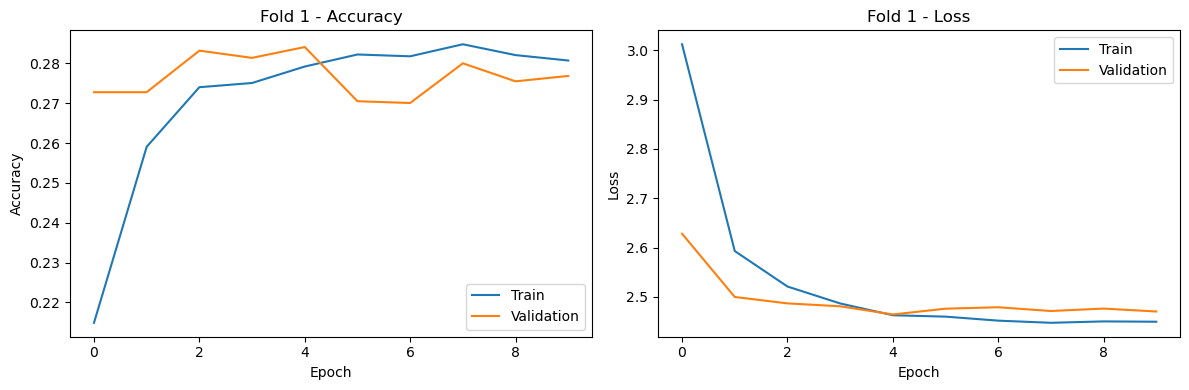

Epoch 1/10
78/78 [==============================] - 4s 39ms/step - loss: 2.9932 - accuracy: 0.2160 - val_loss: 2.5703 - val_accuracy: 0.2755
Epoch 2/10
78/78 [==============================] - 3s 36ms/step - loss: 2.6057 - accuracy: 0.2577 - val_loss: 2.4824 - val_accuracy: 0.2778
Epoch 3/10
78/78 [==============================] - 3s 37ms/step - loss: 2.5225 - accuracy: 0.2746 - val_loss: 2.4949 - val_accuracy: 0.2814
Epoch 4/10
78/78 [==============================] - 3s 37ms/step - loss: 2.4845 - accuracy: 0.2781 - val_loss: 2.4715 - val_accuracy: 0.2796
Epoch 5/10
78/78 [==============================] - 3s 36ms/step - loss: 2.4685 - accuracy: 0.2783 - val_loss: 2.4785 - val_accuracy: 0.2818
Epoch 6/10
78/78 [==============================] - 3s 37ms/step - loss: 2.4604 - accuracy: 0.2791 - val_loss: 2.4677 - val_accuracy: 0.2841
Epoch 7/10
78/78 [==============================] - 3s 38ms/step - loss: 2.4553 - accuracy: 0.2813 - val_loss: 2.4719 - val_accuracy: 0.2841
Epoch 8/10
78

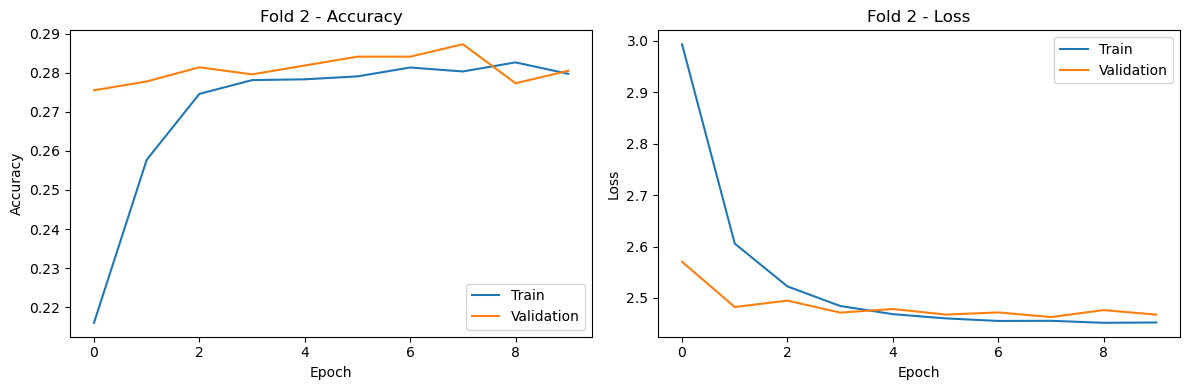

Epoch 1/10
78/78 [==============================] - 4s 38ms/step - loss: 3.0014 - accuracy: 0.2158 - val_loss: 2.6154 - val_accuracy: 0.2728
Epoch 2/10
78/78 [==============================] - 3s 37ms/step - loss: 2.6007 - accuracy: 0.2584 - val_loss: 2.5173 - val_accuracy: 0.2732
Epoch 3/10
78/78 [==============================] - 3s 37ms/step - loss: 2.5280 - accuracy: 0.2717 - val_loss: 2.4837 - val_accuracy: 0.2759
Epoch 4/10
78/78 [==============================] - 3s 36ms/step - loss: 2.4917 - accuracy: 0.2785 - val_loss: 2.4805 - val_accuracy: 0.2850
Epoch 5/10
78/78 [==============================] - 3s 37ms/step - loss: 2.4711 - accuracy: 0.2766 - val_loss: 2.4499 - val_accuracy: 0.2895
Epoch 6/10
78/78 [==============================] - 3s 39ms/step - loss: 2.4581 - accuracy: 0.2809 - val_loss: 2.4543 - val_accuracy: 0.2868
Epoch 7/10
78/78 [==============================] - 3s 37ms/step - loss: 2.4594 - accuracy: 0.2787 - val_loss: 2.4620 - val_accuracy: 0.2932
Epoch 8/10
78

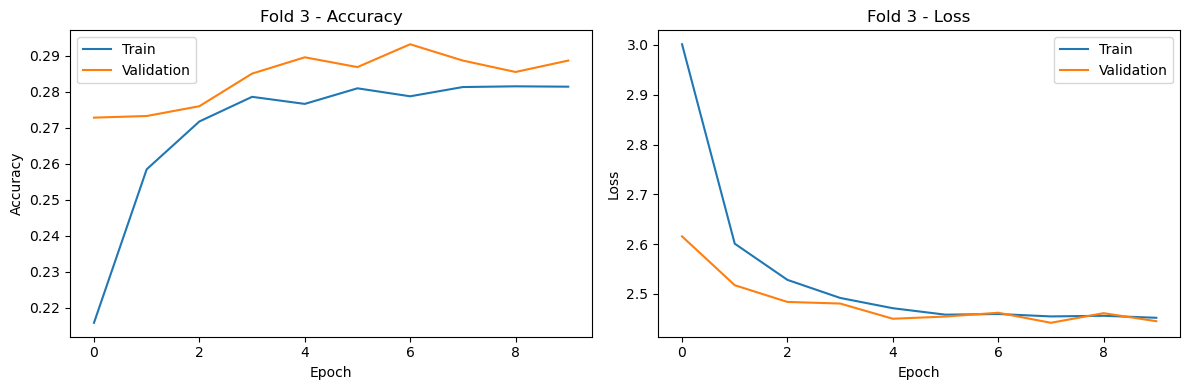

Epoch 1/10
78/78 [==============================] - 4s 38ms/step - loss: 3.0116 - accuracy: 0.2175 - val_loss: 2.5681 - val_accuracy: 0.2728
Epoch 2/10
78/78 [==============================] - 3s 37ms/step - loss: 2.5893 - accuracy: 0.2611 - val_loss: 2.4968 - val_accuracy: 0.2827
Epoch 3/10
78/78 [==============================] - 3s 37ms/step - loss: 2.5222 - accuracy: 0.2736 - val_loss: 2.4823 - val_accuracy: 0.2845
Epoch 4/10
78/78 [==============================] - 3s 38ms/step - loss: 2.4868 - accuracy: 0.2760 - val_loss: 2.4779 - val_accuracy: 0.2868
Epoch 5/10
78/78 [==============================] - 3s 41ms/step - loss: 2.4652 - accuracy: 0.2808 - val_loss: 2.4633 - val_accuracy: 0.2836
Epoch 6/10
78/78 [==============================] - 3s 39ms/step - loss: 2.4582 - accuracy: 0.2782 - val_loss: 2.4617 - val_accuracy: 0.2814
Epoch 7/10
78/78 [==============================] - 3s 43ms/step - loss: 2.4545 - accuracy: 0.2808 - val_loss: 2.4533 - val_accuracy: 0.2836
Epoch 8/10
78

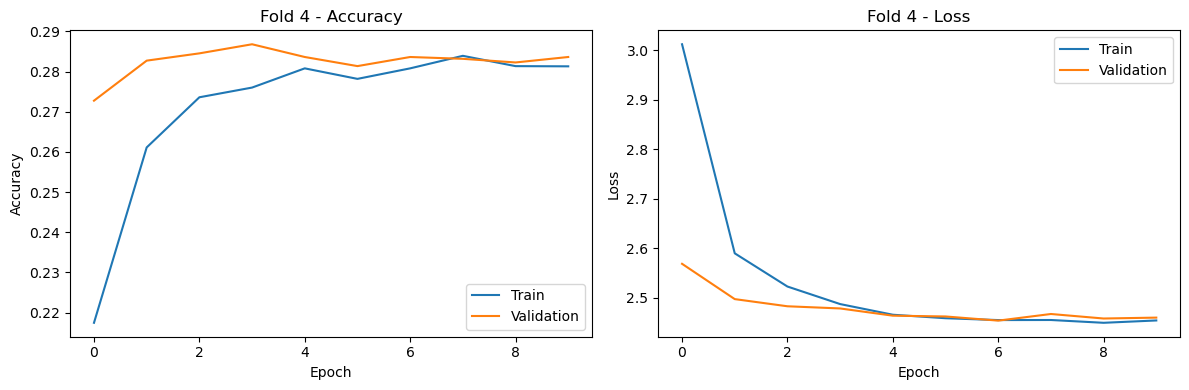

Epoch 1/10
78/78 [==============================] - 5s 44ms/step - loss: 2.9997 - accuracy: 0.2209 - val_loss: 2.5570 - val_accuracy: 0.2719
Epoch 2/10
78/78 [==============================] - 3s 41ms/step - loss: 2.5933 - accuracy: 0.2611 - val_loss: 2.5016 - val_accuracy: 0.2741
Epoch 3/10
78/78 [==============================] - 3s 41ms/step - loss: 2.5198 - accuracy: 0.2716 - val_loss: 2.4764 - val_accuracy: 0.2773
Epoch 4/10
78/78 [==============================] - 3s 41ms/step - loss: 2.4882 - accuracy: 0.2773 - val_loss: 2.4749 - val_accuracy: 0.2728
Epoch 5/10
78/78 [==============================] - 3s 42ms/step - loss: 2.4678 - accuracy: 0.2830 - val_loss: 2.4603 - val_accuracy: 0.2814
Epoch 6/10
78/78 [==============================] - 3s 41ms/step - loss: 2.4605 - accuracy: 0.2818 - val_loss: 2.4753 - val_accuracy: 0.2809
Epoch 7/10
78/78 [==============================] - 3s 36ms/step - loss: 2.4559 - accuracy: 0.2848 - val_loss: 2.4645 - val_accuracy: 0.2800
Epoch 8/10
78

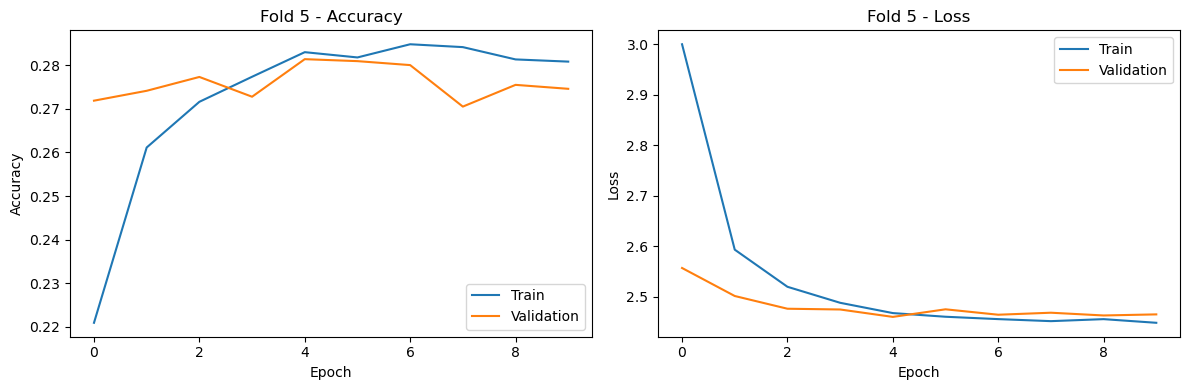

Epoch 1/10
78/78 [==============================] - 4s 39ms/step - loss: 2.9946 - accuracy: 0.2164 - val_loss: 2.5624 - val_accuracy: 0.2728
Epoch 2/10
78/78 [==============================] - 3s 35ms/step - loss: 2.5940 - accuracy: 0.2621 - val_loss: 2.4883 - val_accuracy: 0.2723
Epoch 3/10
78/78 [==============================] - 3s 35ms/step - loss: 2.5213 - accuracy: 0.2721 - val_loss: 2.4786 - val_accuracy: 0.2809
Epoch 4/10
78/78 [==============================] - 3s 35ms/step - loss: 2.4855 - accuracy: 0.2771 - val_loss: 2.4856 - val_accuracy: 0.2728
Epoch 5/10
78/78 [==============================] - 3s 36ms/step - loss: 2.4690 - accuracy: 0.2792 - val_loss: 2.4667 - val_accuracy: 0.2841
Epoch 6/10
78/78 [==============================] - 3s 36ms/step - loss: 2.4564 - accuracy: 0.2821 - val_loss: 2.4643 - val_accuracy: 0.2832
Epoch 7/10
78/78 [==============================] - 3s 36ms/step - loss: 2.4575 - accuracy: 0.2817 - val_loss: 2.4644 - val_accuracy: 0.2827
Epoch 8/10
78

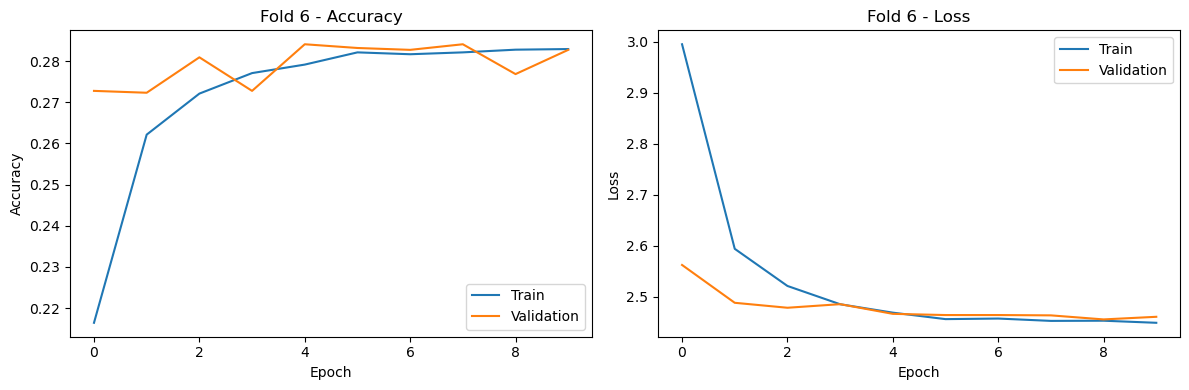

Epoch 1/10
78/78 [==============================] - 4s 38ms/step - loss: 3.0018 - accuracy: 0.2121 - val_loss: 2.5861 - val_accuracy: 0.2728
Epoch 2/10
78/78 [==============================] - 3s 35ms/step - loss: 2.5969 - accuracy: 0.2614 - val_loss: 2.4882 - val_accuracy: 0.2778
Epoch 3/10
78/78 [==============================] - 3s 36ms/step - loss: 2.5164 - accuracy: 0.2716 - val_loss: 2.4734 - val_accuracy: 0.2850
Epoch 4/10
78/78 [==============================] - 3s 35ms/step - loss: 2.4855 - accuracy: 0.2762 - val_loss: 2.4712 - val_accuracy: 0.2868
Epoch 5/10
78/78 [==============================] - 3s 35ms/step - loss: 2.4673 - accuracy: 0.2789 - val_loss: 2.4568 - val_accuracy: 0.2850
Epoch 6/10
78/78 [==============================] - 3s 36ms/step - loss: 2.4591 - accuracy: 0.2792 - val_loss: 2.4549 - val_accuracy: 0.2823
Epoch 7/10
78/78 [==============================] - 3s 36ms/step - loss: 2.4533 - accuracy: 0.2803 - val_loss: 2.4523 - val_accuracy: 0.2864
Epoch 8/10
78

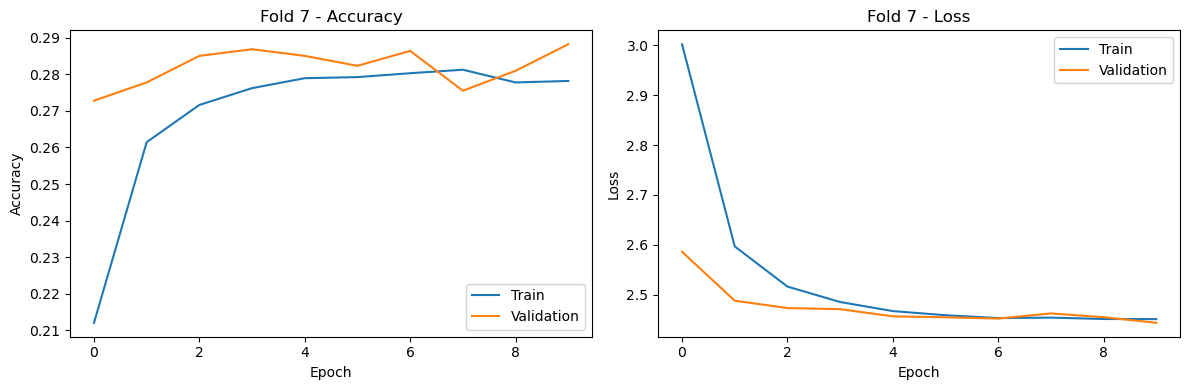

Epoch 1/10
78/78 [==============================] - 5s 46ms/step - loss: 3.0091 - accuracy: 0.2150 - val_loss: 2.5599 - val_accuracy: 0.2729
Epoch 2/10
78/78 [==============================] - 4s 46ms/step - loss: 2.5983 - accuracy: 0.2585 - val_loss: 2.4732 - val_accuracy: 0.2842
Epoch 3/10
78/78 [==============================] - 3s 38ms/step - loss: 2.5247 - accuracy: 0.2697 - val_loss: 2.4620 - val_accuracy: 0.2824
Epoch 4/10
78/78 [==============================] - 3s 38ms/step - loss: 2.4886 - accuracy: 0.2768 - val_loss: 2.4473 - val_accuracy: 0.2897
Epoch 5/10
78/78 [==============================] - 3s 41ms/step - loss: 2.4717 - accuracy: 0.2815 - val_loss: 2.4625 - val_accuracy: 0.2888
Epoch 6/10
78/78 [==============================] - 3s 41ms/step - loss: 2.4647 - accuracy: 0.2802 - val_loss: 2.4511 - val_accuracy: 0.2865
Epoch 7/10
78/78 [==============================] - 3s 40ms/step - loss: 2.4584 - accuracy: 0.2816 - val_loss: 2.4422 - val_accuracy: 0.2888
Epoch 8/10
78

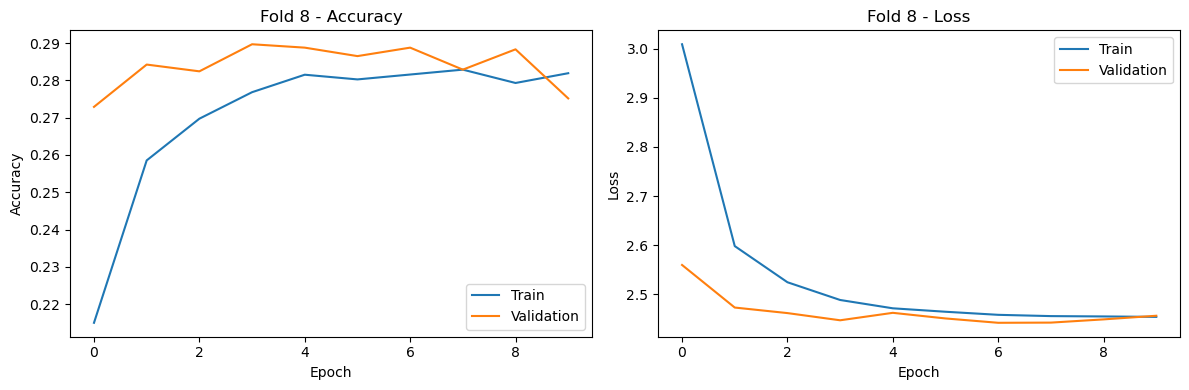

Epoch 1/10
78/78 [==============================] - 5s 43ms/step - loss: 3.0007 - accuracy: 0.2173 - val_loss: 2.5880 - val_accuracy: 0.2729
Epoch 2/10
78/78 [==============================] - 3s 40ms/step - loss: 2.5984 - accuracy: 0.2609 - val_loss: 2.4932 - val_accuracy: 0.2765
Epoch 3/10
78/78 [==============================] - 3s 41ms/step - loss: 2.5281 - accuracy: 0.2735 - val_loss: 2.4799 - val_accuracy: 0.2797
Epoch 4/10
78/78 [==============================] - 3s 40ms/step - loss: 2.4863 - accuracy: 0.2790 - val_loss: 2.4644 - val_accuracy: 0.2797
Epoch 5/10
78/78 [==============================] - 3s 40ms/step - loss: 2.4679 - accuracy: 0.2809 - val_loss: 2.4667 - val_accuracy: 0.2820
Epoch 6/10
78/78 [==============================] - 3s 40ms/step - loss: 2.4585 - accuracy: 0.2819 - val_loss: 2.4572 - val_accuracy: 0.2788
Epoch 7/10
78/78 [==============================] - 3s 39ms/step - loss: 2.4562 - accuracy: 0.2814 - val_loss: 2.4533 - val_accuracy: 0.2783
Epoch 8/10
78

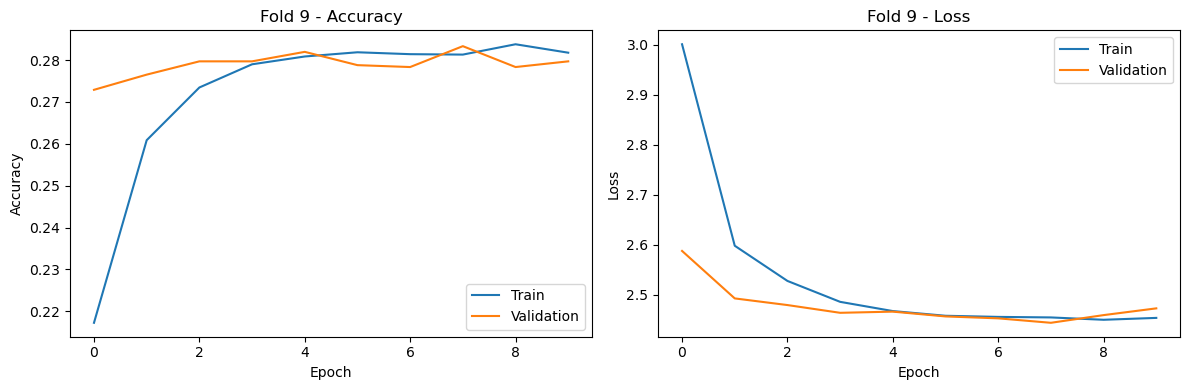

Epoch 1/10
78/78 [==============================] - 5s 44ms/step - loss: 3.0104 - accuracy: 0.2200 - val_loss: 2.5799 - val_accuracy: 0.2729
Epoch 2/10
78/78 [==============================] - 3s 41ms/step - loss: 2.5907 - accuracy: 0.2618 - val_loss: 2.4996 - val_accuracy: 0.2729
Epoch 3/10
78/78 [==============================] - 3s 40ms/step - loss: 2.5244 - accuracy: 0.2701 - val_loss: 2.4846 - val_accuracy: 0.2724
Epoch 4/10
78/78 [==============================] - 3s 40ms/step - loss: 2.4883 - accuracy: 0.2761 - val_loss: 2.4705 - val_accuracy: 0.2815
Epoch 5/10
78/78 [==============================] - 3s 40ms/step - loss: 2.4652 - accuracy: 0.2826 - val_loss: 2.4768 - val_accuracy: 0.2770
Epoch 6/10
78/78 [==============================] - 3s 41ms/step - loss: 2.4588 - accuracy: 0.2818 - val_loss: 2.4665 - val_accuracy: 0.2770
Epoch 7/10
78/78 [==============================] - 3s 40ms/step - loss: 2.4569 - accuracy: 0.2796 - val_loss: 2.4568 - val_accuracy: 0.2869
Epoch 8/10
78

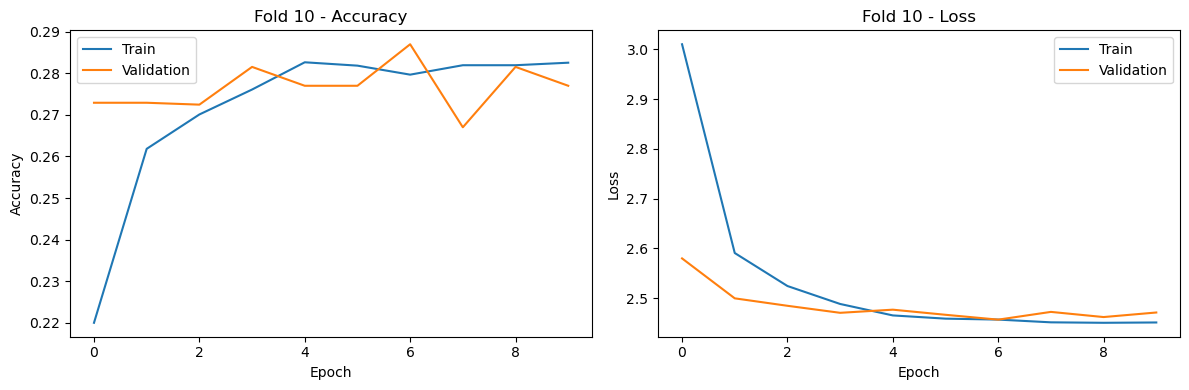

In [171]:
# Loop sobre os folds
for fold_num, (train_index, val_index) in enumerate(stratkf.split(X_train, Y_train)):
    # Redefine os índices para garantir que estejam alinhados corretamente
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    Y_train_fold, Y_val_fold = Y_train_one_hot[train_index], Y_train_one_hot[val_index]


    # Criação do modelo
    model = Sequential()
    model.add(Dense(2048, activation='relu', input_dim=X_train_fold.shape[1]))
    model.add(Dropout(0.6))
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(39, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Treinamento do modelo
    history = model.fit(X_train_fold, Y_train_fold, epochs=10, batch_size=256, validation_data=(X_val_fold, Y_val_fold), verbose=1)

     # Avaliação do modelo no fold atual
    _, accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
    fold_accuracies.append(accuracy)
    # Visualização da acurácia e loss do fold atual
    plt.figure(figsize=(12, 4))

    # Acurácia
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Fold {fold_num + 1} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'Fold {fold_num + 1} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [172]:
# Calcula a média e o desvio padrão das acurácias dos folds
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print(f'Acurácia média: {mean_accuracy:.2f}')
print(f'Desvio padrão da acurácia: {std_accuracy:.2f}')


Acurácia média: 0.28
Desvio padrão da acurácia: 0.01


#### Rede Neural Para o Kaggle

In [173]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [177]:
X_train = normalize_all_columns(train_set_transformed)


DayOfWeek  PdDistrict         X         Y  Year     Month       Day  \
0        0.500000    0.444444  0.555556  0.555556   1.0  0.363636  0.400000   
1        0.500000    0.444444  0.555556  0.555556   1.0  0.363636  0.400000   
2        0.500000    0.444444  0.666667  0.888889   1.0  0.363636  0.400000   
3        0.500000    0.444444  0.555556  0.888889   1.0  0.363636  0.400000   
4        0.500000    0.555556  0.555556  0.555556   1.0  0.363636  0.400000   
...           ...         ...       ...       ...   ...       ...       ...   
877977   0.166667    0.888889  0.333333  0.000000   0.0  0.000000  0.166667   
877978   0.166667    0.222222  0.444444  0.222222   0.0  0.000000  0.166667   
877979   0.166667    0.777778  0.777778  0.666667   0.0  0.000000  0.166667   
877980   0.166667    0.777778  0.888889  0.666667   0.0  0.000000  0.166667   
877981   0.166667    0.000000  0.777778  0.222222   0.0  0.000000  0.166667   

          Period  
0       0.666667  
1       0.666667  
2       0.666667  
3       0.666667  
4       0.666667  
...          ...  
877977  0.000000  
877978  0.000000  
877979  0.000000  
877980  0.000000  
877981  0.000000  

[877982 rows x 8 columns]

In [179]:
Y_train = target_train_transformed

Category
0             37
1             21
2             21
3             16
4             16
...          ...
878044        25
878045        16
878046        16
878047        35
878048        12

[877982 rows x 1 columns]

In [ ]:
# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# One-hot encoding dos rótulos
Y_train_one_hot = to_categorical(Y_train, num_classes=39)
Y_test_one_hot = to_categorical(Y_test, num_classes=39)